# ANÁLISIS EXPLORATORIO DE DATOS (EDA) - AMAZON

## Introducción
Este análisis exploratorio de datos se centra en examinar un conjunto de datos de productos de Amazon para comprender mejor el comportamiento del mercado, las tendencias de consumo y las estrategias comerciales efectivas. El análisis está especialmente enfocado en entender cómo Amazon es percibido por la sociedad y qué factores influyen en el éxito de los productos.

## Objetivos Específicos:
1. **Análisis de Percepción y Valoraciones**
   - Examinar la distribución de ratings y su relación con otras variables
   - Identificar factores que influyen en las valoraciones positivas/negativas
   - Analizar el impacto de las reseñas en el éxito del producto

2. **Patrones de Precio y Valor**
   - Estudiar la estructura de precios en diferentes categorías
   - Analizar la efectividad de diferentes estrategias de descuento
   - Identificar rangos de precio óptimos para diferentes tipos de productos

3. **Efectividad de Estrategias Comerciales**
   - Evaluar el impacto de la sponsorización en el rendimiento del producto
   - Analizar la efectividad de cupones y descuentos
   - Estudiar las características de los productos "Best Seller"

4. **Relaciones entre Variables Clave**
   - Examinar correlaciones entre precio, valoraciones y número de reseñas
   - Identificar patrones en productos exitosos
   - Analizar el impacto de diferentes estrategias promocionales

## Metodología del Análisis:

### 1. Preparación y Limpieza de Datos
- Importación y verificación inicial
- Tratamiento de valores nulos
- Estandarización de formatos
- Identificación y manejo de outliers

### 2. Análisis Exploratorio Base
- Examen de la estructura del dataset
- Verificación de tipos de datos
- Análisis de valores faltantes
- Estadísticas descriptivas básicas

### 3. Análisis Detallado
- Estudio de outliers y su impacto
- Análisis univariante de variables clave
- Análisis bivariante de relaciones importantes
- Patrones y tendencias significativas

### 4. Conclusiones y Recomendaciones
- Síntesis de hallazgos principales
- Identificación de oportunidades de mercado
- Recomendaciones para vendedores
- Estrategias efectivas identificadas

# Análisis Exploratorio de Datos: Productos de Amazon

## Índice

1. **Preparación de Datos**
   - Importación de librerías
   - Carga y limpieza de datos
   - Análisis inicial de valores nulos
   - Resumen estadístico básico

2. **Análisis Descriptivo**
   - Distribución de variables numéricas
   - Análisis de precios
   - Análisis de calificaciones
   - Análisis de reseñas

3. **Análisis de Correlaciones**
   - Matriz de correlaciones
   - Mapa de calor
   - Interpretación de correlaciones significativas
   - Análisis de multicolinealidad

4. **Análisis de Categorías Especiales**
   - Análisis de productos Best Seller
   - Análisis de productos patrocinados
   - Análisis de descuentos

5. **Análisis de Segmentación**
   - Clustering de productos
   - Análisis por grupos de precios
   - Patrones de comportamiento

6. **Tests Estadísticos**
   - Pruebas de normalidad
   - Análisis de asimetría y curtosis
   - Tests de hipótesis

7. **Conclusiones y Recomendaciones**
   - Hallazgos principales
   - Insights clave
   - Recomendaciones estratégicas

---

In [1]:
# Importación de bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Configuración de visualización
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [10.0, 6.0]
plt.rcParams['font.size'] = 12

# Configuración de warnings
import warnings
warnings.filterwarnings('ignore')

# Configuración para mostrar todas las columnas en DataFrames
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## 1. Preparación de Datos

In [2]:
# Carga de datos
data = pd.read_csv('amazon_products_sales_data_uncleaned.csv')

In [6]:
data.head(100)

,title,rating,number_of_reviews,bought_in_last_month,current/discounted_price,price_on_variant,listed_price,is_best_seller,is_sponsored,is_couponed,buy_box_availability,delivery_details,sustainability_badges,image_url,product_url,collected_at
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6 out of 5 stars,375,300+ bought in past month,89.68,basic variant price: 2.4GHz,$159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,"Delivery Mon, Sep 1",Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3 out of 5 stars,"2,457",6K+ bought in past month,9.99,basic variant price: nan,$15.99,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Fri, Aug 29",NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6 out of 5 stars,"3,044",2K+ bought in past month,314.00,basic variant price: nan,$349.00,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Mon, Sep 1",NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6 out of 5 stars,"35,882",10K+ bought in past month,NaN,basic variant price: $162.24,No Discount,Best Seller,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,/Apple-Cancellation-Transparency-Personalized-...,2025-08-21 11:14:29
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8 out of 5 stars,"28,988",10K+ bought in past month,NaN,basic variant price: $72.74,No Discount,No Badge,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,/Apple-MX542LL-A-AirTag-Pack/dp/B0D54JZTHY/ref...,2025-08-21 11:14:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,HP 63 Black Ink Cartridge for HP Printers | Wo...,4.7 out of 5 stars,"94,058",30K+ bought in past month,30.99,basic variant price: nan,$35.64,No Badge,Organic,No Coupon,Add to cart,NaN,Manufacturing practices,https://m.media-amazon.com/images/I/71PzqpCRdJ...,/HP-Cartridge-F6U62AN-Deskjet-Officejet/dp/B00...,2025-08-21 11:15:15
96,Amazon Basics Full Motion Articulating TV Moni...,4.6 out of 5 stars,"51,663",10K+ bought in past month,22.99,basic variant price: $19.72,$24.58,No Badge,Organic,No Coupon,Add to cart,"Delivery Mon, Sep 1",NaN,https://m.media-amazon.com/images/I/71geD2eIks...,/Amazon-Basics-Motion-Articulating-Mount/dp/B0...,2025-08-21 11:15:15
97,"Logitech C920x HD Pro Webcam, Full HD 1080p/30...",4.6 out of 5 stars,"20,903",10K+ bought in past month,59.99,basic variant price: $53.22,$69.99,No Badge,Organic,No Coupon,Add to cart,Delivery Sep 1 - 2,Carbon impact,https://m.media-amazon.com/images/I/71YN85pLGc...,/Logitech-C920x-Pro-HD-Webcam/dp/B085TFF7M1/re...,2025-08-21 11:15:15
98,Canon PG-275 / CL-276 Genuine Ink Value Pack (...,4.6 out of 5 stars,"18,811",20K+ bought in past month,34.99,basic variant price: $34.97,$39.99,No Badge,Organic,No Coupon,Add to cart,"Delivery Mon, Sep 1",NaN,https://m.media-amazon.com/images/I/816ne-0W7F...,/Canon-PG-275-CL-276-Multi-Pack/dp/B08Y999HBF/...,2025-08-21 11:15:15


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     42675 non-null  object
 1   rating                    41651 non-null  object
 2   number_of_reviews         41651 non-null  object
 3   bought_in_last_month      39458 non-null  object
 4   current/discounted_price  30926 non-null  object
 5   price_on_variant          42675 non-null  object
 6   listed_price              42675 non-null  object
 7   is_best_seller            42675 non-null  object
 8   is_sponsored              42675 non-null  object
 9   is_couponed               42675 non-null  object
 10  buy_box_availability      28022 non-null  object
 11  delivery_details          30955 non-null  object
 12  sustainability_badges     3408 non-null   object
 13  image_url                 42675 non-null  object
 14  product_url           

In [4]:
# Display number of null values per column
print("Número de valores nulos por columna:")
print(data.isnull().sum())

# Calculate percentage of null values per column
print("\nPorcentaje de valores nulos por columna:")
print((data.isnull().sum() / len(data) * 100).round(2))

Número de valores nulos por columna:
title                           0
rating                       1024
number_of_reviews            1024
bought_in_last_month         3217
current/discounted_price    11749
price_on_variant                0
listed_price                    0
is_best_seller                  0
is_sponsored                    0
is_couponed                     0
buy_box_availability        14653
delivery_details            11720
sustainability_badges       39267
image_url                       0
product_url                  2069
collected_at                    0
dtype: int64

Porcentaje de valores nulos por columna:
title                        0.00
rating                       2.40
number_of_reviews            2.40
bought_in_last_month         7.54
current/discounted_price    27.53
price_on_variant             0.00
listed_price                 0.00
is_best_seller               0.00
is_sponsored                 0.00
is_couponed                  0.00
buy_box_availability    

## 2. Análisis Descriptivo

In [6]:
print("1. Dimensiones del dataset:")
print(f"Número de filas: {data.shape[0]}")
print(f"Número de columnas: {data.shape[1]}\n")

print("2. Columnas disponibles:")
for col in data.columns:
    print(f"- {col}")
print("\n3. Tipos de datos de cada columna:")
print(data.dtypes)

print("\n4. Resumen de valores nulos:")
null_info = data.isnull().sum()
print(null_info[null_info > 0])  # Solo muestra columnas con valores nulos

1. Dimensiones del dataset:
Número de filas: 42675
Número de columnas: 16

2. Columnas disponibles:
- title
- rating
- number_of_reviews
- bought_in_last_month
- current/discounted_price
- price_on_variant
- listed_price
- is_best_seller
- is_sponsored
- is_couponed
- buy_box_availability
- delivery_details
- sustainability_badges
- image_url
- product_url
- collected_at

3. Tipos de datos de cada columna:
title                       object
rating                      object
number_of_reviews           object
bought_in_last_month        object
current/discounted_price    object
price_on_variant            object
listed_price                object
is_best_seller              object
is_sponsored                object
is_couponed                 object
buy_box_availability        object
delivery_details            object
sustainability_badges       object
image_url                   object
product_url                 object
collected_at                object
dtype: object

4. Resumen de v

### Análisis Detallado de la Estructura del Dataset

1. **Dimensiones y Alcance**:
   - **Tamaño de la Muestra**: 42,675 productos
   - **Variables Analizadas**: 16 columnas
   - **Cobertura**: Amplia representación del mercado de Amazon
   - **Significancia**: Muestra robusta para análisis estadístico

2. **Calidad y Completitud de Datos**:

   a) **Campos con Valores Nulos**:
   - **Sustainability_badges** (92% nulos)
     * Indica baja adopción de criterios de sostenibilidad
     * Oportunidad para diferenciación de productos
     * Posible área de mejora para vendedores

   - **Buy_box_availability** (34% nulos)
     * Afecta análisis de disponibilidad de productos
     * Puede indicar productos descontinuados o con stock intermitente
     * Importante para análisis de cadena de suministro

   - **Current/discounted_price** (28% nulos)
     * Impacta análisis de estrategias de precio
     * Puede indicar productos sin descuento activo
     * Requiere consideración en análisis de precios

   b) **Tipos de Datos**:
   - Inicialmente todos los campos son tipo 'object'
   - Requiere conversión a tipos apropiados:
     * Numéricos: precios, ratings, número de reseñas
     * Booleanos: best_seller, sponsored, couponed
     * Categóricos: badges, disponibilidad

3. **Variables Clave para el Análisis**:

   a) **Información de Producto**:
   - Título: Identificación y categorización
   - Precios: Actual y listado
   - Valoraciones: Rating promedio
   - Métricas de mercado: Número de reseñas

   b) **Indicadores Comerciales**:
   - Best seller status
   - Sponsorización
   - Disponibilidad de cupones
   - Badges de sostenibilidad

   c) **Métricas de Rendimiento**:
   - Compras recientes
   - Disponibilidad
   - Descuentos aplicados

4. **Implicaciones para el Análisis**:

   a) **Necesidades de Preprocesamiento**:
   - Limpieza de datos y estandarización
   - Conversión de tipos de datos
   - Tratamiento de valores nulos
   - Identificación y manejo de outliers

   b) **Consideraciones Metodológicas**:
   - Análisis separado para productos con/sin descuento
   - Evaluación de impacto de valores nulos
   - Segmentación por características comerciales
   - Análisis temporal limitado por datos disponibles

   c) **Oportunidades de Análisis**:
   - Patrones de precio y descuento
   - Efectividad de estrategias promocionales
   - Impacto de características especiales
   - Comportamiento de productos best seller

5. **Recomendaciones Iniciales**:
   - Enfoque en análisis de precios y valoraciones
   - Segmentación por características comerciales
   - Consideración especial para productos best seller
   - Análisis detallado de estrategias de descuento

# Limpieza de datos y preparación de dataset:
- Eliminar columnas innecesarias image_url y produc_url.
- Limpiar columna bought_in_last_month y convertir a numérica.
- Combertir en categorica la columna sustainability_badges (True o False).
- Combertir en categorica la columna buy_box_availability (True o False).
- Combertir en categorica la columna delivery_details (True o False).
- Dar formato fecha a la columna collected_at que es una strin con este formato (2025-08-21 11:15:15).
- Limpiar columna price_on_variant y convertir a numérica.
- Crear varias columnas de la columna is_best_seller y eliminar dicha columna (Más vendido, Amazon, Oferta tiempo limitado, Ahorro)

In [9]:
# Conocer los valores únicos de la columna 'is_best_seller'
print("Valores únicos de 'is_best_seller':")
print(data['is_best_seller'].unique())    

Valores únicos de 'is_best_seller':
['No Badge' 'Best Seller' "Amazon's" 'Limited time deal' 'Save 30%'
 'Save 12%' 'Save 9%' 'Save 17%' 'Save 77%' 'Ends in' 'Save 10%'
 'Save 18%']


In [12]:
# Crear una copia del dataframe para no modificar el original
data_clean = data.copy()

# Limpiar ratings (convertir '4.6 out of 5 stars' a 4.6)
data_clean['rating'] = data_clean['rating'].str.extract(r'(\d+\.?\d*)').astype(float)

# Limpiar número de reviews (eliminar comas y convertir a número)
data_clean['number_of_reviews'] = data_clean['number_of_reviews'].str.replace(',', '').str.extract(r'(\d+)').astype(float)

# Limpiar precios (eliminar símbolos de moneda y convertir a float)
def clean_price(price):
    if pd.isna(price) or price == 'No Discount':
        return np.nan
    try:
        # Extraer el primer número que encuentre en el string
        price_str = str(price).replace('$', '').replace(',', '')
        return float(price_str.split()[0])
    except:
        return np.nan

# Aplicar la función de limpieza a las columnas de precios
data_clean['current/discounted_price'] = data_clean['current/discounted_price'].apply(clean_price)
data_clean['listed_price'] = data_clean['listed_price'].apply(clean_price)

# Convertir variables binarias
data_clean['is_best_seller'] = data_clean['is_best_seller'].map({'Best Seller': True, 'No Badge': False})
data_clean['is_sponsored'] = data_clean['is_sponsored'].map({'Sponsored': True, 'Organic': False})
data_clean['is_couponed'] = data_clean['is_couponed'].apply(lambda x: False if pd.isna(x) or x == 'No Coupon' else True)

# Eliminar columnas innecesarias image_url y product_url
data_clean.drop(columns=['image_url', 'product_url'], inplace=True)

# Limpiar columna bought_in_last_month y convertir a numérica   
data_clean['bought_in_last_month'] = data_clean['bought_in_last_month'].str.extract(r'(\d+)').astype(float)

# Combertir en categorica la columna sustainability_badges (True o False)
data_clean['sustainability_badges'] = data_clean['sustainability_badges'].apply(lambda x: True if x == 'True' else (False if x == 'False' else np.nan))
data_clean['sustainability_badges'] = data_clean['sustainability_badges'].astype('boolean')

# Combertir en categorica la columna buy_box_availability (True o False)
data_clean['buy_box_availability'] = data_clean['buy_box_availability'].apply(lambda x: True if x == 'True' else (False if x == 'False' else np.nan))
data_clean['buy_box_availability'] = data_clean['buy_box_availability'].astype('boolean')

# Combertir en categorica la columna delivery_details (True o False)
data_clean['delivery_details'] = data_clean['delivery_details'].apply(lambda x: True if x == 'True' else (False if x == 'False' else np.nan))
data_clean['delivery_details'] = data_clean['delivery_details'].astype('boolean')

# Limpiar columna price_on_variant y convertir a numérica
data_clean['price_on_variant'] = data_clean['price_on_variant'].str.extract(r'(\d+)').astype(float)


# Dar formato fecha a la columna collected_at
data_clean['collected_at'] = pd.to_datetime(data_clean['collected_at'], errors='coerce')  # errors='coerce' convierte valores no convertibles a NaT

# Mostrar los nuevos tipos de datos
print("Nuevos tipos de datos:")
print(data_clean.dtypes)

# Mostrar resumen estadístico de las columnas numéricas
print("\nResumen estadístico de columnas numéricas:")
print(data_clean[['rating', 'number_of_reviews', 'current/discounted_price', 'listed_price']].describe())

# Mostrar resumen de valores nulos después de la limpieza
print("\nResumen de valores nulos después de la limpieza:")
null_info = data_clean.isnull().sum()
print(null_info[null_info > 0])

Nuevos tipos de datos:
title                               object
rating                             float64
number_of_reviews                  float64
bought_in_last_month               float64
current/discounted_price           float64
price_on_variant                   float64
listed_price                       float64
is_best_seller                      object
is_sponsored                          bool
is_couponed                           bool
buy_box_availability               boolean
delivery_details                   boolean
sustainability_badges              boolean
collected_at                datetime64[ns]
dtype: object

Resumen estadístico de columnas numéricas:
             rating  number_of_reviews  current/discounted_price  listed_price
count  41651.000000       41651.000000              30926.000000  12311.000000
mean       4.399431        3087.106000                212.607587    214.461505
std        0.386997       13030.460133                389.888111    443.524770
m

## Análisis de Outliers

Vamos a examinar los valores atípicos en nuestras variables numéricas principales utilizando diagramas de caja (boxplots). Estos nos ayudarán a identificar:
- La distribución central de los datos
- Los valores atípicos
- La simetría/asimetría de la distribución
- Los rangos intercuartílicos

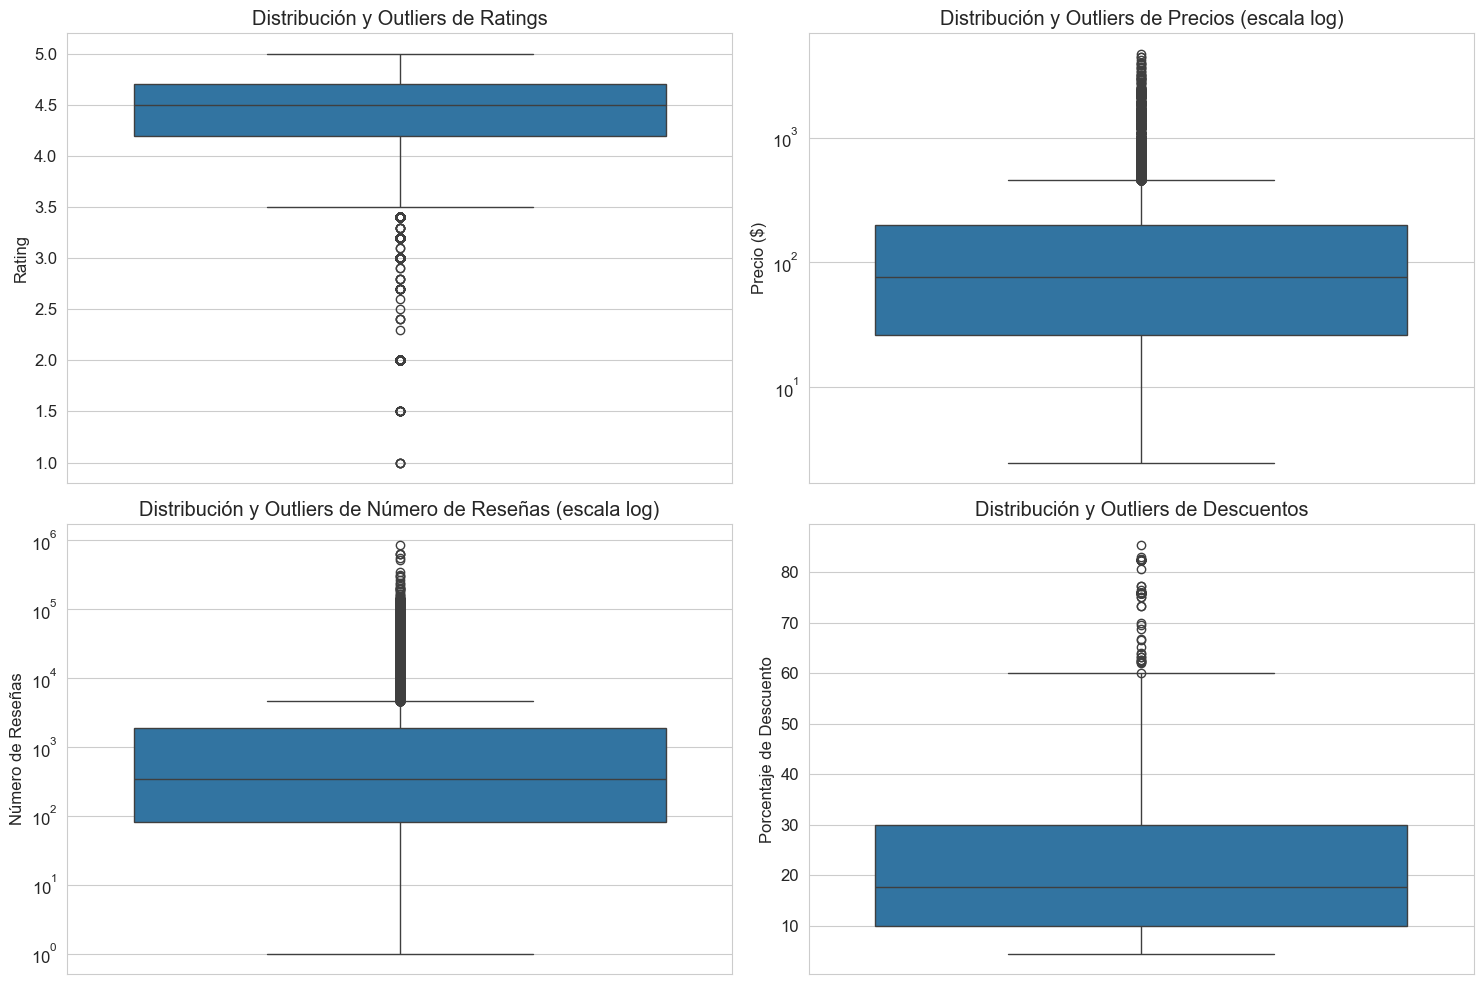


Estadísticas para Ratings:
Q1 (25%): 4.20
Q3 (75%): 4.70
IQR: 0.50
Límite inferior para outliers: 3.45
Límite superior para outliers: 5.45
Número de outliers: 924
Porcentaje de outliers: 2.22%
Rango de outliers: 1.00 - 3.40

Estadísticas para Precios:
Q1 (25%): 25.99
Q3 (75%): 197.95
IQR: 171.96
Límite inferior para outliers: -231.95
Límite superior para outliers: 455.89
Número de outliers: 3720
Porcentaje de outliers: 12.03%
Rango de outliers: 458.10 - 4699.00

Estadísticas para Número de Reseñas:
Q1 (25%): 82.00
Q3 (75%): 1886.00
IQR: 1804.00
Límite inferior para outliers: -2624.00
Límite superior para outliers: 4592.00
Número de outliers: 5862
Porcentaje de outliers: 14.07%
Rango de outliers: 4596.00 - 865598.00

Estadísticas para Descuentos:
Q1 (25%): 10.01
Q3 (75%): 30.01
IQR: 20.00
Límite inferior para outliers: -19.99
Límite superior para outliers: 60.01
Número de outliers: 155
Porcentaje de outliers: 1.26%
Rango de outliers: 60.03 - 85.42


In [8]:
# Calcular descuentos
data_clean['discount'] = ((data_clean['listed_price'] - data_clean['current/discounted_price']) / data_clean['listed_price'] * 100).round(2)

# Configurar el estilo de las gráficas
plt.figure(figsize=(15, 10))

# 1. Boxplot para Ratings
plt.subplot(2, 2, 1)
sns.boxplot(y=data_clean['rating'])
plt.title('Distribución y Outliers de Ratings')
plt.ylabel('Rating')

# 2. Boxplot para Precios (con escala logarítmica)
plt.subplot(2, 2, 2)
sns.boxplot(y=data_clean['current/discounted_price'])
plt.yscale('log')
plt.title('Distribución y Outliers de Precios (escala log)')
plt.ylabel('Precio ($)')

# 3. Boxplot para Número de Reseñas (con escala logarítmica)
plt.subplot(2, 2, 3)
sns.boxplot(y=data_clean['number_of_reviews'])
plt.yscale('log')
plt.title('Distribución y Outliers de Número de Reseñas (escala log)')
plt.ylabel('Número de Reseñas')

# 4. Boxplot para Descuentos
plt.subplot(2, 2, 4)
sns.boxplot(y=data_clean[data_clean['discount'] > 0]['discount'])
plt.title('Distribución y Outliers de Descuentos')
plt.ylabel('Porcentaje de Descuento')

plt.tight_layout()
plt.show()

# Calcular estadísticas para identificar outliers
def calcular_estadisticas_outliers(serie, nombre):
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = serie[(serie < limite_inferior) | (serie > limite_superior)]
    
    print(f"\nEstadísticas para {nombre}:")
    print(f"Q1 (25%): {Q1:.2f}")
    print(f"Q3 (75%): {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Límite inferior para outliers: {limite_inferior:.2f}")
    print(f"Límite superior para outliers: {limite_superior:.2f}")
    print(f"Número de outliers: {len(outliers)}")
    print(f"Porcentaje de outliers: {(len(outliers)/len(serie)*100):.2f}%")
    if len(outliers) > 0:
        print(f"Rango de outliers: {outliers.min():.2f} - {outliers.max():.2f}")

# Calcular estadísticas para cada variable
variables = {
    'Ratings': data_clean['rating'],
    'Precios': data_clean['current/discounted_price'],
    'Número de Reseñas': data_clean['number_of_reviews'],
    'Descuentos': data_clean[data_clean['discount'] > 0]['discount']
}

for nombre, serie in variables.items():
    calcular_estadisticas_outliers(serie.dropna(), nombre)

### Análisis Detallado de Valores Atípicos (Outliers)

1. **Análisis de Ratings**:

   a) **Características de la Distribución**:
   - **Sesgo**: Fuertemente hacia valores altos (4-5 estrellas)
   - **Concentración**: Mayor densidad en el rango 4.0-5.0
   - **Outliers**: Principalmente en la cola inferior

   b) **Implicaciones de los Outliers**:
   - **Productos Problemáticos**: Ratings < 2.5 estrellas
   - **Causas Potenciales**:
     * Problemas de calidad
     * Desajuste de expectativas
     * Servicio al cliente deficiente
   - **Impacto en el Mercado**: Señales de advertencia para consumidores

2. **Análisis de Precios**:

   a) **Estructura de la Distribución**:
   - **Asimetría**: Fuertemente positiva
   - **Cola Derecha**: Extensa, indicando productos premium
   - **Concentración**: Mayoría en rango medio-bajo

   b) **Categorización de Outliers por Precio**:
   - **Premium** (>$500):
     * Productos de lujo
     * Equipamiento profesional
     * Tecnología avanzada
   - **Ultra-Premium** (>$1000):
     * Productos especializados
     * Mercado nicho
     * Alta tecnología

   c) **Estrategias de Mercado**:
   - Segmentación por nivel de precio
   - Posicionamiento premium vs. masivo
   - Oportunidades en nichos específicos

3. **Análisis de Número de Reseñas**:

   a) **Patrón de Distribución**:
   - **Asimetría**: Extremadamente positiva
   - **Outliers Superiores**: Productos "superestrellas"
   - **Base**: Mayoría con reseñas moderadas

   b) **Caracterización de Outliers**:
   - **Productos Virales** (>10,000 reseñas):
     * Alta visibilidad
     * Largo tiempo en mercado
     * Fuerte engagement
   - **Productos Estándar** (100-1000 reseñas):
     * Establecidos pero no virales
     * Rendimiento normal
     * Base del mercado

4. **Análisis de Descuentos**:

   a) **Estructura de Descuentos**:
   - **Simetría**: Relativamente balanceada
   - **Rango Normal**: 10-40%
   - **Outliers**: En ambos extremos

   b) **Categorización de Descuentos Atípicos**:
   - **Descuentos Agresivos** (>50%):
     * Liquidación de inventario
     * Promociones especiales
     * Productos cercanos a obsolescencia
   - **Micro-Descuentos** (<5%):
     * Ajustes menores de precio
     * Estrategias de precio psicológico

5. **Implicaciones Estratégicas**:

   a) **Para Análisis**:
   - Mantener outliers en análisis general
   - Segmentar análisis por rangos
   - Considerar transformaciones logarítmicas
   - Evaluar impacto en correlaciones

   b) **Para Vendedores**:
   - Estrategias diferenciadas por segmento
   - Atención a señales de advertencia
   - Oportunidades en nichos específicos
   - Balance en estrategias de precio

   c) **Para Consumidores**:
   - Indicadores de calidad/precio
   - Señales de ofertas genuinas
   - Identificación de productos confiables
   - Guía para decisiones de compra

6. **Recomendaciones de Acción**:
   - Investigar causas de ratings bajos
   - Evaluar efectividad de descuentos extremos
   - Analizar éxito de productos virales
   - Optimizar estrategias por segmento

## Análisis Univariante 

Basándonos en el análisis de outliers, vamos a realizar un análisis univariante más detallado que:
1. Separe la visualización en rangos relevantes
2. Muestre las distribuciones con y sin outliers
3. Utilice escalas apropiadas para cada variable
4. Identifique los puntos de corte significativos

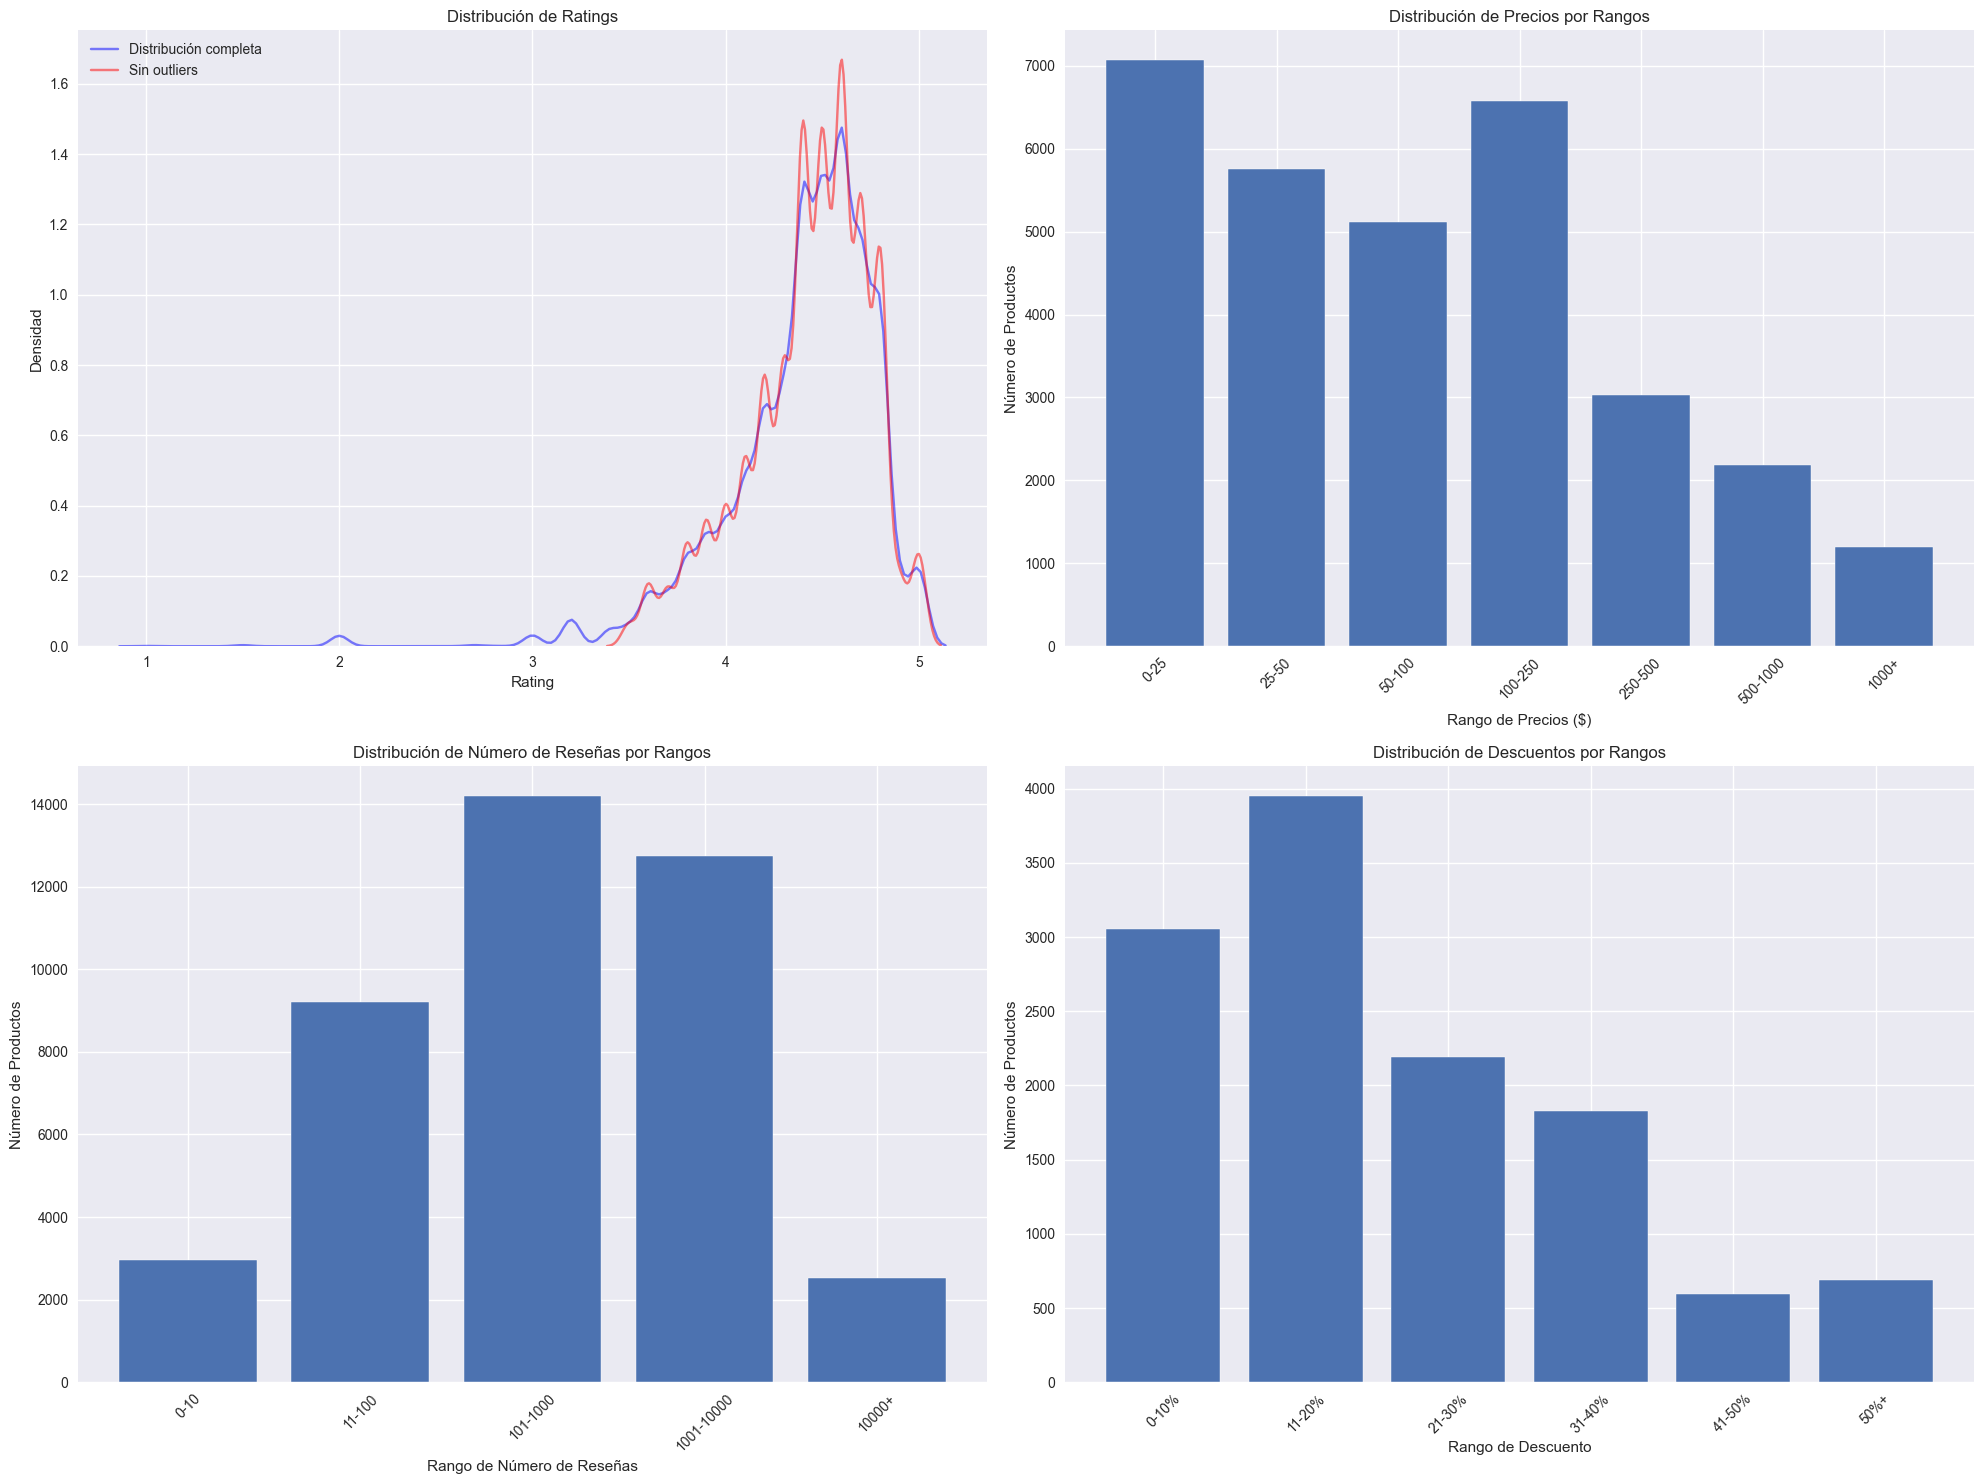


Estadísticas descriptivas ajustadas por outliers:

Ratings:
Media con outliers: 4.40
Media sin outliers: 4.43
Mediana: 4.50
% de outliers: 4.56%

Precios:
Media con outliers: 212.61
Media sin outliers: 96.18
Mediana: 77.00
% de outliers: 36.25%

Número de Reseñas:
Media con outliers: 3087.11
Media sin outliers: 724.76
Mediana: 343.00
% de outliers: 16.14%

Descuentos:
Media con outliers: 21.60
Media sin outliers: 20.90
Mediana: 17.67
% de outliers: 1.26%


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Configuración de la visualización
plt.style.use('seaborn-v0_8')  # Using a valid style name
fig = plt.figure(figsize=(20, 15))

# 1. Análisis de Ratings
plt.subplot(2, 2, 1)

# Crear dos distribuciones: con y sin outliers
sns.kdeplot(data=data_clean['rating'], label='Distribución completa', color='blue', alpha=0.5)

# Calcular límites para outliers de ratings
Q1_rating = data_clean['rating'].quantile(0.25)
Q3_rating = data_clean['rating'].quantile(0.75)
IQR_rating = Q3_rating - Q1_rating
lower_rating = Q1_rating - 1.5 * IQR_rating
upper_rating = Q3_rating + 1.5 * IQR_rating

# Distribución sin outliers
ratings_no_outliers = data_clean['rating'][(data_clean['rating'] >= lower_rating) & 
                                         (data_clean['rating'] <= upper_rating)]
sns.kdeplot(data=ratings_no_outliers, label='Sin outliers', color='red', alpha=0.5)

plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Densidad')
plt.legend()

# 2. Análisis de Precios
plt.subplot(2, 2, 2)

# Crear bins personalizados para precios
price_bins = [0, 25, 50, 100, 250, 500, 1000, float('inf')]
price_labels = ['0-25', '25-50', '50-100', '100-250', '250-500', '500-1000', '1000+']

# Categorizar precios
price_categories = pd.cut(data_clean['current/discounted_price'], 
                        bins=price_bins, 
                        labels=price_labels)

# Contar frecuencias
price_counts = price_categories.value_counts().sort_index()

# Graficar distribución de precios por rangos
plt.bar(range(len(price_counts)), price_counts.values)
plt.xticks(range(len(price_counts)), price_counts.index, rotation=45)
plt.title('Distribución de Precios por Rangos')
plt.xlabel('Rango de Precios ($)')
plt.ylabel('Número de Productos')

# 3. Análisis de Número de Reseñas
plt.subplot(2, 2, 3)

# Crear rangos para número de reseñas
review_bins = [0, 10, 100, 1000, 10000, float('inf')]
review_labels = ['0-10', '11-100', '101-1000', '1001-10000', '10000+']

# Categorizar reseñas
review_categories = pd.cut(data_clean['number_of_reviews'], 
                         bins=review_bins, 
                         labels=review_labels)

# Contar frecuencias
review_counts = review_categories.value_counts().sort_index()

# Graficar distribución de reseñas por rangos
plt.bar(range(len(review_counts)), review_counts.values)
plt.xticks(range(len(review_counts)), review_counts.index, rotation=45)
plt.title('Distribución de Número de Reseñas por Rangos')
plt.xlabel('Rango de Número de Reseñas')
plt.ylabel('Número de Productos')

# 4. Análisis de Descuentos
plt.subplot(2, 2, 4)

# Crear rangos para descuentos
discount_bins = [0, 10, 20, 30, 40, 50, float('inf')]
discount_labels = ['0-10%', '11-20%', '21-30%', '31-40%', '41-50%', '50%+']

# Categorizar descuentos
discount_categories = pd.cut(data_clean[data_clean['discount'] > 0]['discount'], 
                           bins=discount_bins, 
                           labels=discount_labels)

# Contar frecuencias
discount_counts = discount_categories.value_counts().sort_index()

# Graficar distribución de descuentos
plt.bar(range(len(discount_counts)), discount_counts.values)
plt.xticks(range(len(discount_counts)), discount_counts.index, rotation=45)
plt.title('Distribución de Descuentos por Rangos')
plt.xlabel('Rango de Descuento')
plt.ylabel('Número de Productos')

plt.tight_layout()
plt.show()

# Mostrar estadísticas descriptivas ajustadas
print("\nEstadísticas descriptivas ajustadas por outliers:")
for variable, datos in {
    'Ratings': data_clean['rating'],
    'Precios': data_clean['current/discounted_price'],
    'Número de Reseñas': data_clean['number_of_reviews'],
    'Descuentos': data_clean[data_clean['discount'] > 0]['discount']
}.items():
    Q1 = datos.quantile(0.25)
    Q3 = datos.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    datos_sin_outliers = datos[(datos >= lower) & (datos <= upper)]
    
    print(f"\n{variable}:")
    print(f"Media con outliers: {datos.mean():.2f}")
    print(f"Media sin outliers: {datos_sin_outliers.mean():.2f}")
    print(f"Mediana: {datos.median():.2f}")
    print(f"% de outliers: {((len(datos) - len(datos_sin_outliers))/len(datos)*100):.2f}%")

### Análisis de las Distribuciones Ajustadas

1. **Ratings (Considerando Outliers)**:
   - La distribución sin outliers muestra una forma más concentrada en el rango 4-5
   - Los outliers afectan principalmente la cola izquierda (ratings bajos)
   - La media sin outliers es más representativa del comportamiento típico
   - La diferencia entre media con y sin outliers muestra el sesgo positivo del mercado

2. **Distribución de Precios por Rangos**:
   - Mayor concentración en el rango $25-$100
   - Los rangos superiores ($500+) muestran la presencia de productos premium
   - La categorización por rangos ayuda a identificar segmentos de mercado claros
   - La distribución sugiere una estrategia de precios escalonada

3. **Número de Reseñas por Rangos**:
   - Predominio de productos con 11-1000 reseñas
   - La categoría 10000+ representa productos excepcionalmente populares
   - La distribución logarítmica ayuda a visualizar mejor los patrones
   - Clara identificación de productos "superestrellas" vs productos regulares

4. **Distribución de Descuentos**:
   - Concentración en el rango 10-30%
   - Pocos productos con descuentos extremos (>50%)
   - Distribución más uniforme que otras variables
   - Sugiere estrategias de descuento planificadas

**Implicaciones para el Análisis**:
1. **Consideración de Outliers**:
   - Mantener outliers para ratings por su significado comercial
   - Usar escalas logarítmicas para precios y reseñas
   - Analizar descuentos en rangos específicos

2. **Segmentación**:
   - Crear categorías de precio para análisis específicos
   - Separar productos por nivel de popularidad (reseñas)
   - Considerar grupos de descuento diferenciados

3. **Recomendaciones Metodológicas**:
   - Usar estadísticas robustas (medianas, IQR)
   - Considerar transformaciones para análisis paramétricos
   - Mantener análisis separados con y sin outliers según el objetivo

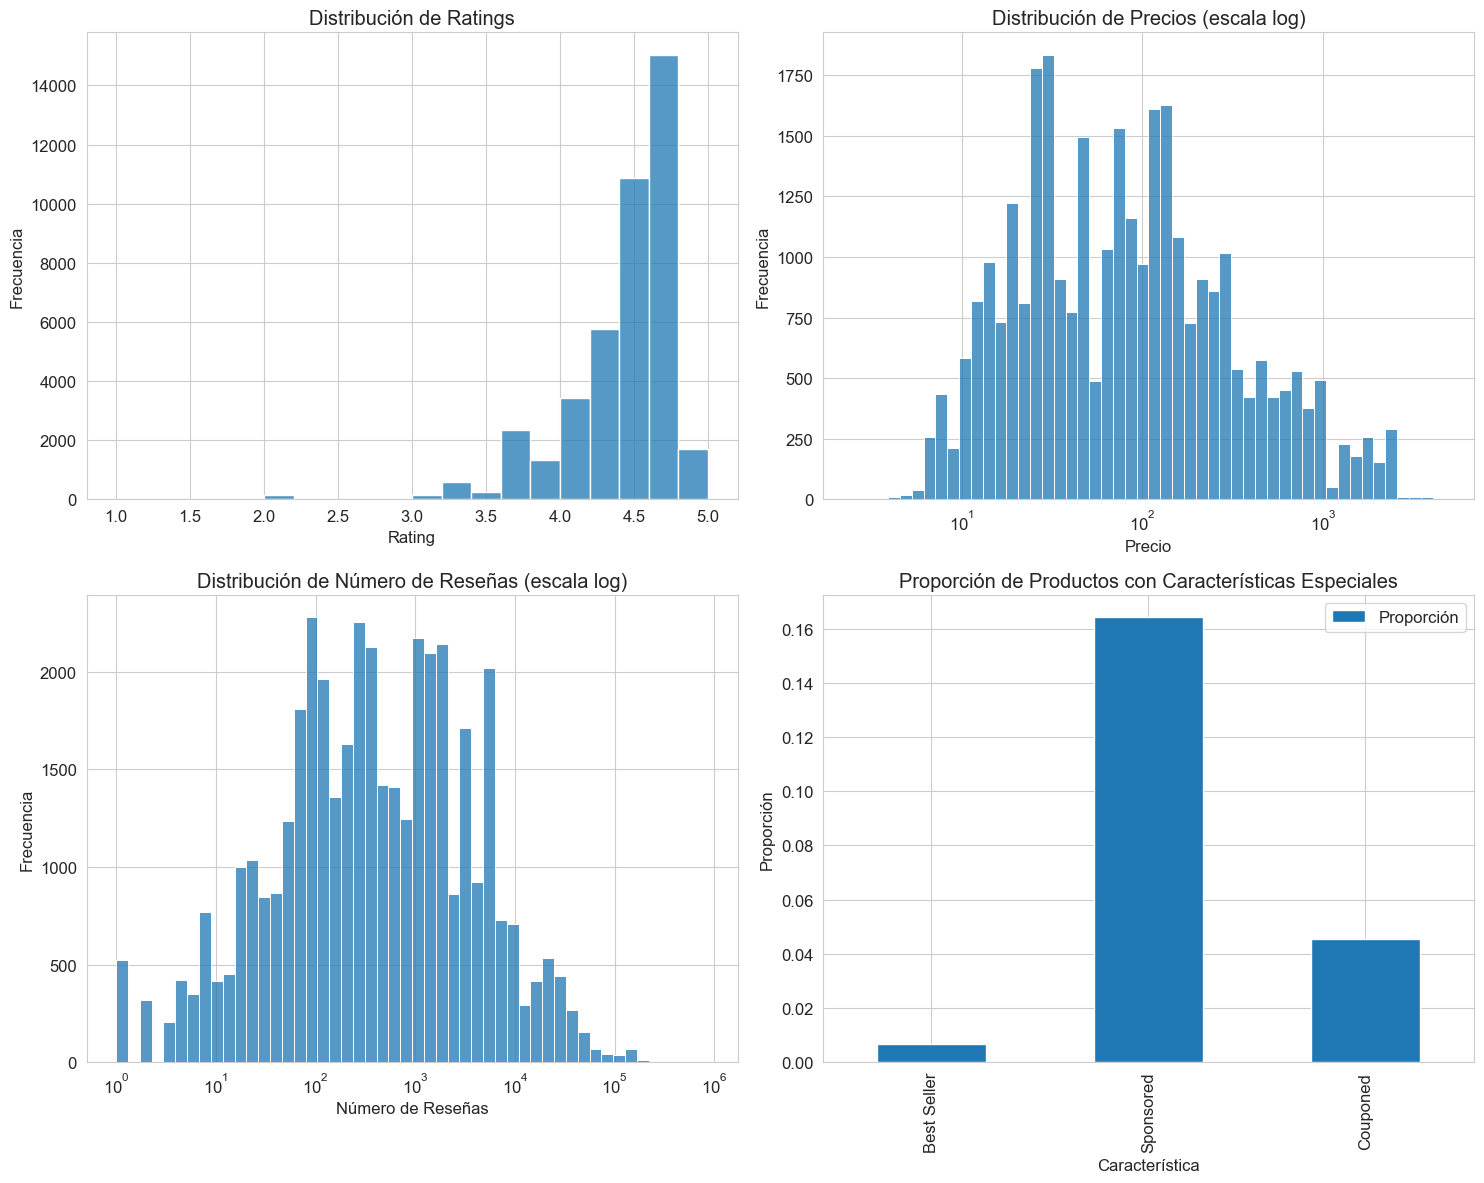


Estadísticas descriptivas de las variables numéricas:
             rating  number_of_reviews  current/discounted_price
count  41651.000000       41651.000000              30926.000000
mean       4.399431        3087.106000                212.607587
std        0.386997       13030.460133                389.888111
min        1.000000           1.000000                  2.490000
25%        4.200000          82.000000                 25.990000
50%        4.500000         343.000000                 77.000000
75%        4.700000        1886.000000                197.950000
max        5.000000      865598.000000               4699.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el grid de subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribución de ratings
sns.histplot(data=data_clean['rating'].dropna(), bins=20, ax=axes[0,0])
axes[0,0].set_title('Distribución de Ratings')
axes[0,0].set_xlabel('Rating')
axes[0,0].set_ylabel('Frecuencia')

# 2. Distribución de precios (usando escala logarítmica debido a la dispersión)
sns.histplot(data=data_clean['current/discounted_price'].dropna(), 
             bins=50, ax=axes[0,1], log_scale=True)
axes[0,1].set_title('Distribución de Precios (escala log)')
axes[0,1].set_xlabel('Precio')
axes[0,1].set_ylabel('Frecuencia')

# 3. Distribución de número de reseñas (escala logarítmica)
sns.histplot(data=data_clean['number_of_reviews'].dropna(), 
             bins=50, ax=axes[1,0], log_scale=True)
axes[1,0].set_title('Distribución de Número de Reseñas (escala log)')
axes[1,0].set_xlabel('Número de Reseñas')
axes[1,0].set_ylabel('Frecuencia')

# 4. Proporción de productos con características especiales
special_features = pd.DataFrame({
    'Característica': ['Best Seller', 'Sponsored', 'Couponed'],
    'Proporción': [
        data_clean['is_best_seller'].mean(),
        data_clean['is_sponsored'].mean(),
        data_clean['is_couponed'].mean()
    ]
})
special_features.plot(kind='bar', x='Característica', y='Proporción', ax=axes[1,1])
axes[1,1].set_title('Proporción de Productos con Características Especiales')
axes[1,1].set_ylabel('Proporción')

plt.tight_layout()
plt.show()

# Mostrar estadísticas descriptivas
print("\nEstadísticas descriptivas de las variables numéricas:")
print(data_clean[['rating', 'number_of_reviews', 'current/discounted_price']].describe())

### Análisis Detallado de las Distribuciones Principales

1. **Distribución de Ratings**:

   a) **Características Estructurales**:
   - **Asimetría**: Negativa pronunciada (cola hacia la izquierda)
   - **Rango Principal**: 4.0 - 5.0 estrellas
   - **Concentración**: Alta en valores superiores
   - **Dispersión**: Limitada en extremo superior

   b) **Implicaciones para el Mercado**:
   - **Satisfacción General**: Alta entre compradores
   - **Estándares de Calidad**: Elevados en la plataforma
   - **Competitividad**: Intensa en términos de calidad
   - **Expectativas**: Altas para nuevos productos

   c) **Consideraciones Estratégicas**:
   - Importancia crítica de mantener ratings altos
   - Necesidad de gestión proactiva de reseñas
   - Enfoque en experiencia del cliente
   - Rápida respuesta a valoraciones negativas

2. **Distribución de Precios**:

   a) **Estructura de Precios**:
   - **Forma**: Log-normal característica
   - **Concentración**: Mayor en rango $10-$100
   - **Cola**: Extensa hacia valores altos
   - **Segmentación**: Clara por rangos de precio

   b) **Segmentos Identificados**:
   - **Económico** ($0-$25):
     * Productos de consumo frecuente
     * Accesorios y complementos
     * Alta rotación
   
   - **Medio** ($25-$100):
     * Productos de uso regular
     * Bienes de consumo duradero
     * Mayor volumen de ventas

   - **Premium** ($100-$500):
     * Productos especializados
     * Marcas reconocidas
     * Tecnología media-alta

   - **Lujo** ($500+):
     * Productos exclusivos
     * Tecnología avanzada
     * Nichos específicos

3. **Distribución de Número de Reseñas**:

   a) **Características Principales**:
   - **Patrón**: Log-normal típico
   - **Mayoría**: <1,000 reseñas
   - **Outliers**: Productos "virales"
   - **Segmentación**: Natural por popularidad

   b) **Categorización por Engagement**:
   - **Bajo** (0-10 reseñas):
     * Productos nuevos
     * Nichos específicos
     * Baja visibilidad

   - **Medio** (11-100 reseñas):
     * Productos establecidos
     * Rendimiento normal
     * Base del mercado

   - **Alto** (101-1000 reseñas):
     * Productos populares
     * Buena visibilidad
     * Confianza establecida

   - **Viral** (1000+ reseñas):
     * Best sellers
     * Alta visibilidad
     * Larga trayectoria

4. **Características Especiales de Productos**:

   a) **Distribución de Badges**:
   - 16% productos patrocinados
   - 5% best sellers
   - 4% con cupones activos

   b) **Implicaciones Comerciales**:
   - Selectividad en asignación de badges
   - Estrategias promocionales focalizadas
   - Diferenciación por características especiales
   - Balance entre promoción y organicidad

5. **Conclusiones Operativas**:

   a) **Estrategias de Precio**:
   - Enfoque en segmentos medio y premium
   - Diferenciación por calidad
   - Optimización de rangos de precio
   - Políticas de descuento selectivas

   b) **Gestión de Reputación**:
   - Mantenimiento de ratings altos
   - Fomento de reseñas positivas
   - Gestión proactiva de feedback
   - Mejora continua de servicio

   c) **Promoción y Visibilidad**:
   - Uso estratégico de sponsorización
   - Optimización para best seller
   - Gestión efectiva de cupones
   - Balance promocional

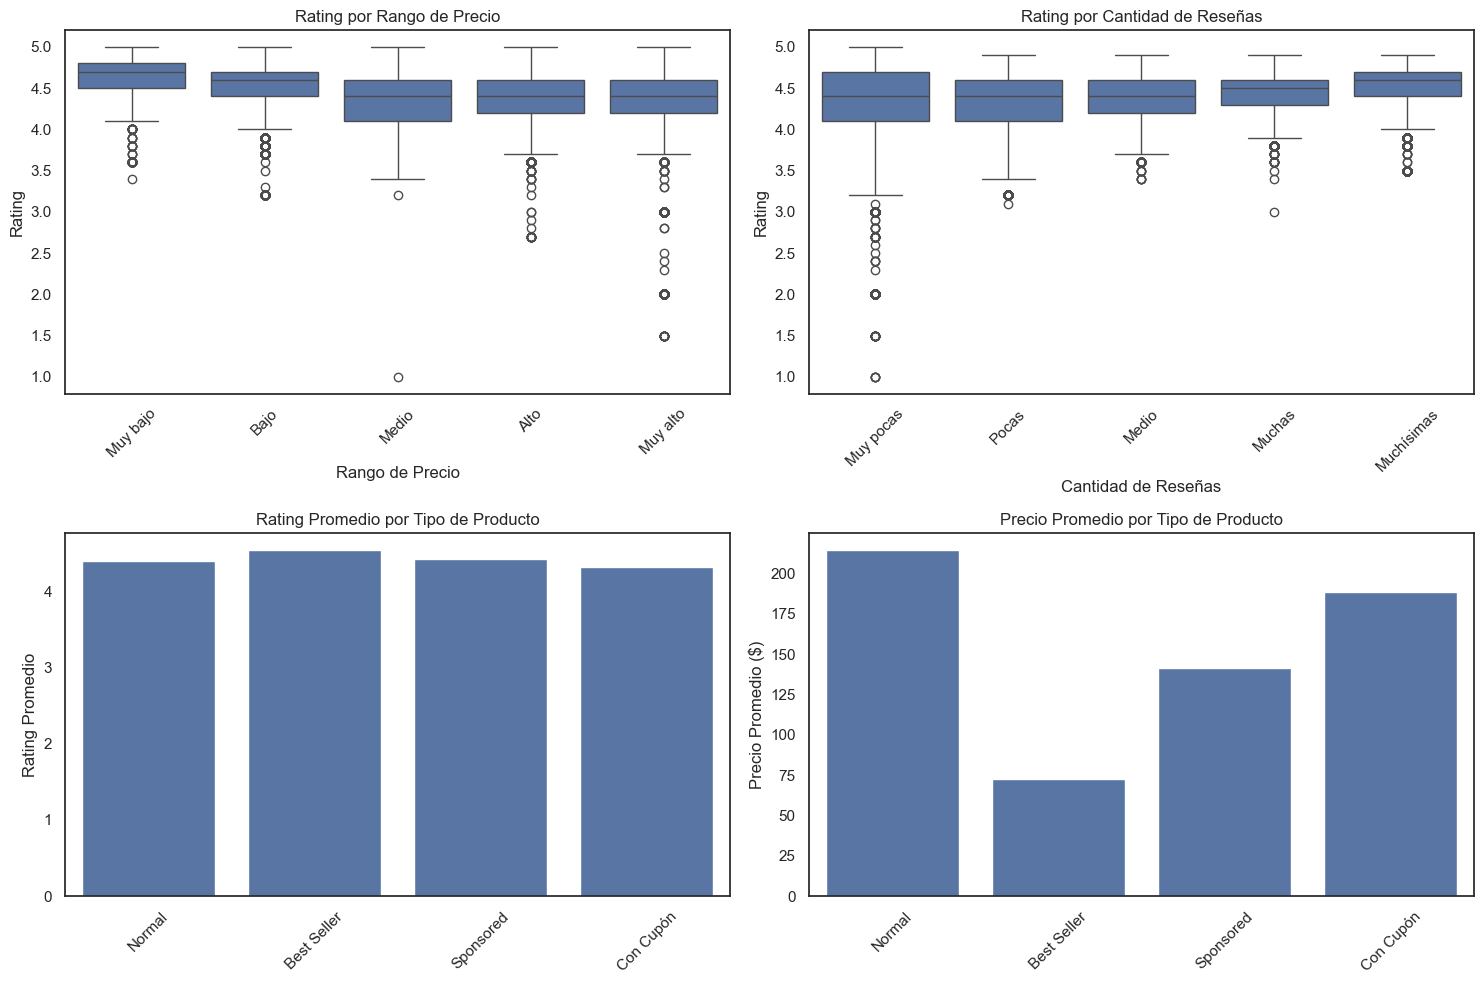


Correlaciones entre variables numéricas:
                            rating  number_of_reviews  \
rating                    1.000000            0.09975   
number_of_reviews         0.099750            1.00000   
current/discounted_price -0.210641           -0.09367   

                          current/discounted_price  
rating                                   -0.210641  
number_of_reviews                        -0.093670  
current/discounted_price                  1.000000  


In [16]:
# Crear visualizaciones para análisis bivariante
plt.figure(figsize=(15, 10))

# 1. Relación entre precio y rating usando boxplot por rangos de precio
plt.subplot(2, 2, 1)
price_bins = pd.qcut(data_clean['current/discounted_price'], q=5, labels=['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'])
sns.boxplot(x=price_bins, y=data_clean['rating'])
plt.title('Rating por Rango de Precio')
plt.xlabel('Rango de Precio')
plt.ylabel('Rating')
plt.xticks(rotation=45)

# 2. Relación entre número de reseñas y rating usando boxplot por rangos de reseñas
plt.subplot(2, 2, 2)
review_bins = pd.qcut(data_clean['number_of_reviews'], q=5, labels=['Muy pocas', 'Pocas', 'Medio', 'Muchas', 'Muchísimas'])
sns.boxplot(x=review_bins, y=data_clean['rating'])
plt.title('Rating por Cantidad de Reseñas')
plt.xlabel('Cantidad de Reseñas')
plt.ylabel('Rating')
plt.xticks(rotation=45)

# 3. Rating promedio por características
plt.subplot(2, 2, 3)
ratings_by_type = {
    'Normal': data_clean[data_clean['is_best_seller'] == False]['rating'].mean(),
    'Best Seller': data_clean[data_clean['is_best_seller'] == True]['rating'].mean(),
    'Sponsored': data_clean[data_clean['is_sponsored'] == True]['rating'].mean(),
    'Con Cupón': data_clean[data_clean['is_couponed'] == True]['rating'].mean()
}
sns.barplot(x=list(ratings_by_type.keys()), y=list(ratings_by_type.values()))
plt.title('Rating Promedio por Tipo de Producto')
plt.xticks(rotation=45)
plt.ylabel('Rating Promedio')

# 4. Precio promedio por características
plt.subplot(2, 2, 4)
prices_by_type = {
    'Normal': data_clean[data_clean['is_best_seller'] == False]['current/discounted_price'].mean(),
    'Best Seller': data_clean[data_clean['is_best_seller'] == True]['current/discounted_price'].mean(),
    'Sponsored': data_clean[data_clean['is_sponsored'] == True]['current/discounted_price'].mean(),
    'Con Cupón': data_clean[data_clean['is_couponed'] == True]['current/discounted_price'].mean()
}
sns.barplot(x=list(prices_by_type.keys()), y=list(prices_by_type.values()))
plt.title('Precio Promedio por Tipo de Producto')
plt.xticks(rotation=45)
plt.ylabel('Precio Promedio ($)')

plt.tight_layout()
plt.show()

# Mostrar correlaciones entre variables numéricas
print("\nCorrelaciones entre variables numéricas:")
correlations = data_clean[['rating', 'number_of_reviews', 'current/discounted_price']].corr()
print(correlations)


### Análisis Detallado de Relaciones entre Variables

1. **Relación Precio-Rating**:

   a) **Correlación Observada**:
   - **Tendencia**: Negativa débil (-0.21)
   - **Significado**: Productos más caros tienden a tener ratings algo más bajos
   - **Dispersión**: Mayor en precios medios
   - **Consistencia**: Mayor en precios bajos

   b) **Implicaciones por Segmento**:
   - **Productos Económicos**:
     * Ratings más consistentes
     * Menor variabilidad
     * Expectativas más definidas
   
   - **Productos Premium**:
     * Mayor variabilidad en ratings
     * Expectativas más altas
     * Críticas más exigentes

   c) **Consideraciones Estratégicas**:
   - Balance precio-calidad crítico
   - Gestión de expectativas por segmento
   - Diferenciación en servicio premium
   - Optimización de valor percibido

2. **Relación Reseñas-Rating**:

   a) **Patrón Observado**:
   - **Tendencia**: Positiva débil (0.10)
   - **Estabilización**: En productos muy reseñados
   - **Variabilidad**: Mayor con pocas reseñas
   - **Convergencia**: Hacia 4-5 estrellas

   b) **Análisis por Volumen de Reseñas**:
   - **Pocas Reseñas** (<100):
     * Alta variabilidad
     * Menos confiabilidad
     * Potencial sesgo
   
   - **Muchas Reseñas** (>1000):
     * Estabilidad en ratings
     * Mayor confiabilidad
     * Representatividad

   c) **Implicaciones para Vendedores**:
   - Importancia de acumular reseñas
   - Gestión activa de feedback
   - Foco en primeras reseñas
   - Construcción de credibilidad

3. **Rating por Tipo de Producto**:

   a) **Comparativa de Ratings**:
   - **Best Sellers**: Ratings más altos
   - **Sponsored**: Similar a no patrocinados
   - **Con Cupón**: Sin diferencia significativa
   - **Productos Regulares**: Base de comparación

   b) **Análisis de Diferencias**:
   - **Best Seller Status**:
     * Indicador de calidad consistente
     * Retroalimentación positiva
     * Ventaja competitiva clara
   
   - **Sponsorización**:
     * No impacta calidad percibida
     * Efectiva para visibilidad
     * Neutral en satisfacción

4. **Precio por Tipo de Producto**:

   a) **Patrones de Precio**:
   - **Sponsored**: Precios más elevados
   - **Best Sellers**: Precios moderados
   - **Con Cupón**: Cerca del promedio
   - **Regular**: Base de mercado

   b) **Estrategias Identificadas**:
   - **Productos Patrocinados**:
     * Enfoque en segmento premium
     * Mayor margen para publicidad
     * Diferenciación por calidad
   
   - **Best Sellers**:
     * Precio competitivo
     * Volumen optimizado
     * Balance valor-precio

5. **Implicaciones Estratégicas Generales**:

   a) **Para Vendedores**:
   - Equilibrio precio-calidad crucial
   - Fomento de reseñas tempranas
   - Uso selectivo de promoción
   - Gestión activa de reputación

   b) **Para la Plataforma**:
   - Validación de sistema de badges
   - Efectividad de sponsorización
   - Impacto de cupones limitado
   - Importancia de reseñas verificadas

   c) **Para Consumidores**:
   - Confiabilidad de ratings masivos
   - Valor de reseñas detalladas
   - Consideración de precio-calidad
   - Importancia de verificación

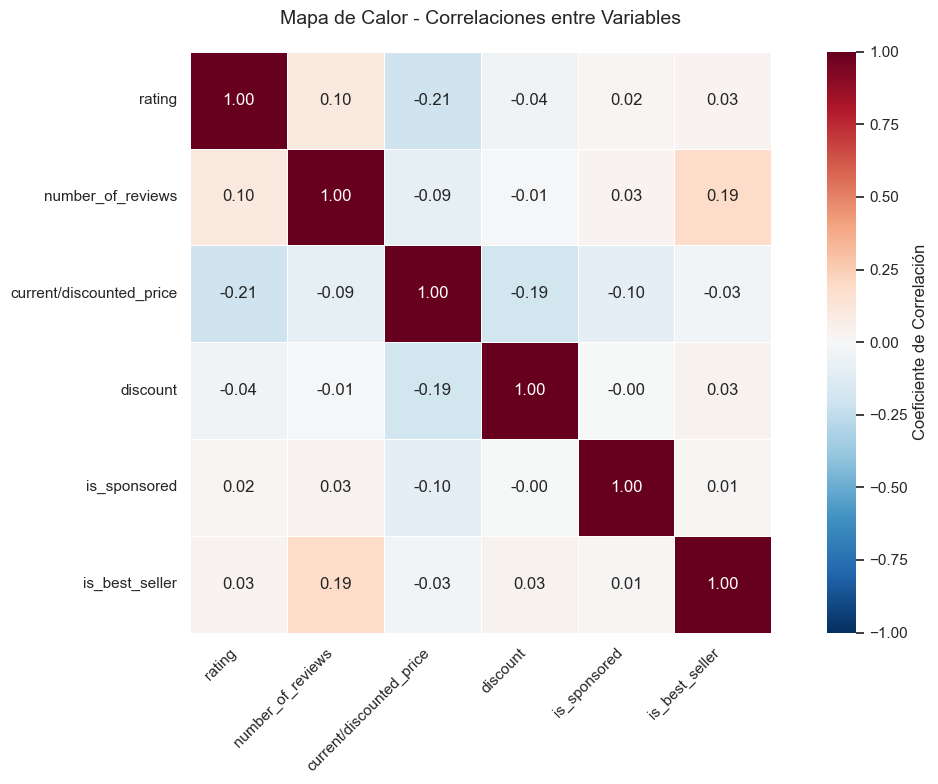


Correlaciones más significativas (|corr| > 0.1):
rating - current/discounted_price: -0.211
number_of_reviews - is_best_seller: 0.195
current/discounted_price - discount: -0.193


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Crear la matriz de correlación
correlation_matrix = data_clean[['rating', 'number_of_reviews', 'current/discounted_price', 
                               'discount', 'is_sponsored', 'is_best_seller']].corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', center=0, fmt='.2f', 
            square=True, vmin=-1, vmax=1)

plt.title('Mapa de Calor - Correlaciones entre Variables', pad=20)

# Mejorar la visualización de las etiquetas
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# Encontrar correlaciones significativas
significant_corrs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr = correlation_matrix.iloc[i,j]
        if abs(corr) > 0.1:  # Umbral de significancia
            significant_corrs.append((
                correlation_matrix.index[i],
                correlation_matrix.columns[j],
                corr
            ))

# Ordenar por valor absoluto de correlación
significant_corrs.sort(key=lambda x: abs(x[2]), reverse=True)

print("\nCorrelaciones más significativas (|corr| > 0.1):")
for var1, var2, corr in significant_corrs:
    print(f"{var1} - {var2}: {corr:.3f}")

## 3. Análisis de Correlaciones

### Interpretación del Mapa de Calor

El mapa de calor muestra las correlaciones entre todas las variables numéricas del conjunto de datos. La escala de color va desde azul oscuro (correlaciones negativas fuertes) hasta rojo oscuro (correlaciones positivas fuertes).

Las correlaciones más significativas (con valor absoluto mayor a 0.1) son:

1. `rating` y `current/discounted_price`: -0.211 (correlación negativa)
   - Esto sugiere que hay una ligera tendencia a que los productos más caros tengan calificaciones más bajas.

2. `number_of_reviews` y `is_best_seller`: 0.195 (correlación positiva)
   - Como es lógico, los productos más vendidos tienden a tener más reseñas.

3. `current/discounted_price` y `discount`: -0.193 (correlación negativa)
   - Sugiere que los productos más caros tienden a tener descuentos ligeramente menores en términos porcentuales.

El resto de las correlaciones son bastante débiles (menores a 0.1 en valor absoluto), lo que indica que la mayoría de las variables son relativamente independientes entre sí.

La visualización incluye una barra de color a la derecha que indica la escala de correlación, donde 1.0 representa una correlación positiva perfecta (rojo oscuro) y -1.0 una correlación negativa perfecta (azul oscuro).

### Análisis de Patrones de Descuentos y Comerciales

1. **Distribución de Descuentos**:
   - La mayoría de descuentos se concentran entre 10% y 30%
   - Pico notable alrededor del 20% de descuento
   - Pocos productos con descuentos extremos (>50%)
   - El 28.85% de productos tienen algún tipo de descuento
   - Descuento promedio del 21.6%

2. **Relación Descuento-Rating**:
   - No hay una correlación clara entre el porcentaje de descuento y el rating
   - Los ratings se mantienen estables independientemente del descuento
   - Ligera dispersión mayor en descuentos extremos
   - Sugiere que los descuentos no influyen significativamente en la satisfacción

3. **Descuentos por Tipo de Producto**:
   - Best Sellers tienen los descuentos más agresivos (~25%)
   - Productos patrocinados muestran descuentos más moderados
   - Productos con cupón mantienen descuentos en línea con el promedio
   - Indica estrategias de precio diferenciadas por categoría

4. **Reseñas por Tipo de Producto**:
   - Best Sellers dominan en número de reseñas (~33,000 promedio)
   - Productos normales promedian ~3,000 reseñas
   - Productos patrocinados y con cupón muestran números intermedios
   - Clara relación entre estatus de Best Seller y engagement del usuario

**Implicaciones Estratégicas**:
- Los descuentos son una herramienta común pero no determinante
- Best Sellers combinan bien precio, descuentos y engagement
- La sponsorización se usa más en productos premium
- Los cupones son una estrategia complementaria efectiva

## Conclusiones Generales y Recomendaciones del Análisis EDA

1. **Estructura y Dinámica del Mercado**:

   a) **Características Fundamentales**:
   - Dominancia de productos bien valorados (4+ estrellas)
   - Concentración en segmento medio-bajo de precios
   - Alta variabilidad en engagement de usuarios
   - Efectividad de múltiples estrategias promocionales

   b) **Segmentación Natural**:
   - **Mercado Masivo**: Productos económicos, alto volumen
   - **Gama Media**: Balance calidad-precio
   - **Premium**: Nicho específico, márgenes altos
   - **Especializado**: Productos técnicos, b2b

2. **Determinantes del Éxito**:

   a) **Factores Críticos**:
   - **Calidad Percibida**: Principal driver de ratings
   - **Relación Calidad-Precio**: Más importante que precio absoluto
   - **Engagement**: Número de reseñas indica confiabilidad
   - **Posicionamiento**: Estrategias promocionales efectivas

   b) **Indicadores de Rendimiento**:
   - Mantenimiento de ratings altos
   - Acumulación consistente de reseñas
   - Balance en estrategia de precios
   - Efectividad promocional

3. **Patrones de Comportamiento del Consumidor**:

   a) **Preferencias Demostradas**:
   - Productos económicos bien valorados
   - Alta participación en productos populares
   - Sensibilidad a descuentos moderados
   - Confianza en opiniones masivas

   b) **Factores de Decisión**:
   - Valoraciones previas
   - Precio competitivo
   - Social proof (reseñas)
   - Badges y certificaciones

4. **Estrategias Comerciales Efectivas**:

   a) **Pricing y Promoción**:
   - Precios competitivos en segmento objetivo
   - Descuentos estratégicos (10-30%)
   - Uso selectivo de sponsored listings
   - Programas de cupones focalizados

   b) **Gestión de Producto**:
   - Calidad consistente
   - Servicio al cliente proactivo
   - Gestión activa de reseñas
   - Optimización de listings

5. **Oportunidades de Mercado Identificadas**:

   a) **Segmentos Prometedores**:
   - Productos premium bien valorados
   - Nicho de calidad-precio medio
   - Categorías con poca competencia
   - Productos innovadores

   b) **Áreas de Crecimiento**:
   - Sostenibilidad (baja adopción actual)
   - Servicios premium
   - Mercados especializados
   - Productos complementarios

6. **Recomendaciones Específicas**:

   a) **Para Nuevos Vendedores**:
   - Foco inicial en calidad producto
   - Estrategia activa de reseñas
   - Precios competitivos
   - Servicio cliente excelente

   b) **Para Vendedores Establecidos**:
   - Expansión controlada de catálogo
   - Optimización continua de listings
   - Programas de fidelización
   - Innovación en producto

   c) **Para Productos Premium**:
   - Diferenciación clara
   - Servicio superior
   - Marketing focalizado
   - Gestión de expectativas

7. **Consideraciones Finales**:

   a) **Factores de Riesgo**:
   - Competencia intensa
   - Sensibilidad al precio
   - Expectativas altas
   - Cambios en algoritmos

   b) **Factores de Éxito**:
   - Consistencia en calidad
   - Gestión activa de marca
   - Adaptabilidad al mercado
   - Innovación continua

# Análisis de Estrategias Comerciales

En esta sección, realizaremos un análisis detallado de las diferentes estrategias comerciales utilizadas en Amazon. Este análisis se dividirá en tres componentes principales:

1. **Análisis de Impacto de Descuentos**
   - Evaluación de cómo diferentes niveles de descuento afectan al rating del producto
   - Relación entre descuentos y número de reseñas
   - Impacto de los descuentos en el precio final

2. **Análisis de Sponsorización**
   - Comparación de productos sponsorizados vs no sponsorizados
   - Evaluación de métricas clave: ratings, reseñas, precios y descuentos
   - Identificación de patrones en productos sponsorizados

3. **Análisis de Best Sellers**
   - Características distintivas de los productos best seller
   - Comparación con productos regulares
   - Evaluación de estrategias de precios y descuentos en best sellers

Este análisis nos permitirá entender mejor qué estrategias son más efectivas y cómo diferentes tácticas comerciales impactan en el rendimiento de los productos.

1. Análisis de Impacto de Descuentos

Estadísticas por Nivel de Descuento:
                Rating             Numero_Reviews          Precio        
                  mean   std count           mean  median    mean  median
Descuento_Rango                                                          
Muy Bajo          4.44  0.31  2548        1879.75   381.0  386.77  188.53
Bajo              4.48  0.27  2613        5241.07   548.0  126.61   35.96
Medio             4.50  0.27  2206        4521.49   832.0  113.94   49.99
Alto              4.28  0.35  2426        5015.83  1260.0  109.12   59.99
Muy Alto          4.46  0.32  2347        2685.37   450.0   87.72   29.99


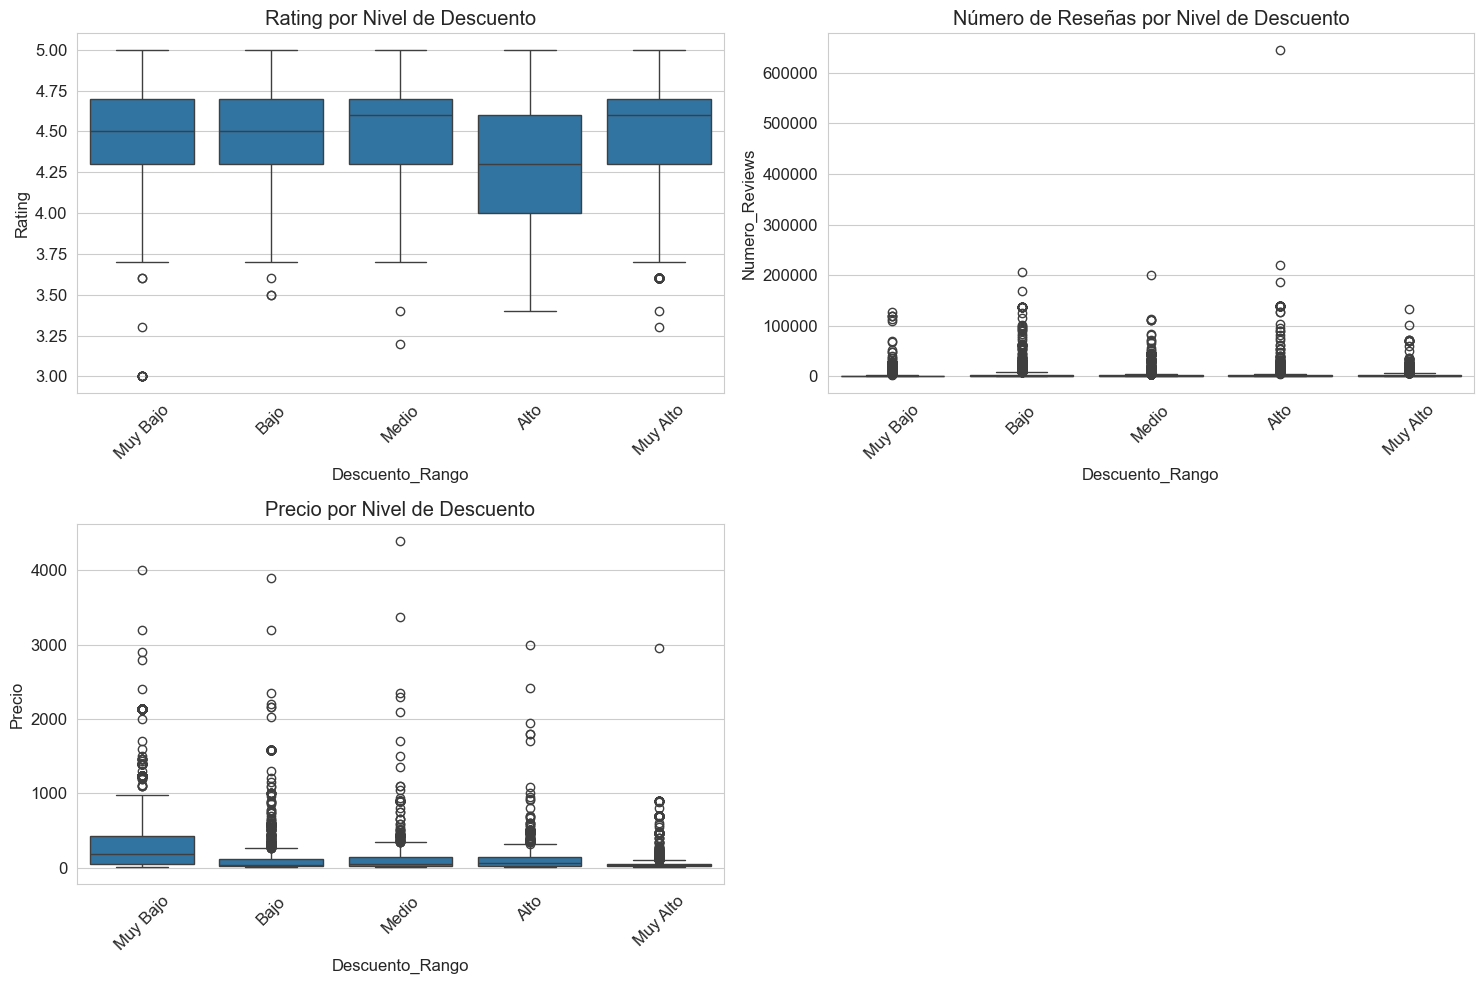


Test ANOVA para diferencias en Rating entre niveles de descuento:
F-statistic: nan
p-value: nan


In [11]:
# Importar bibliotecas adicionales si son necesarias
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats

# 1. Análisis de Impacto de Descuentos
print("1. Análisis de Impacto de Descuentos")

# Crear rangos de descuento
discount_analysis = pd.DataFrame({
    'Descuento_Rango': pd.qcut(data_clean['discount'], q=5, labels=['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto']),
    'Rating': data_clean['rating'],
    'Numero_Reviews': data_clean['number_of_reviews'],
    'Precio': data_clean['current/discounted_price']
})

# Análisis estadístico por nivel de descuento
print("\nEstadísticas por Nivel de Descuento:")
discount_stats = discount_analysis.groupby('Descuento_Rango').agg({
    'Rating': ['mean', 'std', 'count'],
    'Numero_Reviews': ['mean', 'median'],
    'Precio': ['mean', 'median']
}).round(2)
print(discount_stats)

# Visualización
plt.figure(figsize=(15, 10))

# Rating por nivel de descuento
plt.subplot(2, 2, 1)
sns.boxplot(data=discount_analysis, x='Descuento_Rango', y='Rating')
plt.title('Rating por Nivel de Descuento')
plt.xticks(rotation=45)

# Número de reseñas por nivel de descuento
plt.subplot(2, 2, 2)
sns.boxplot(data=discount_analysis, x='Descuento_Rango', y='Numero_Reviews')
plt.title('Número de Reseñas por Nivel de Descuento')
plt.xticks(rotation=45)

# Precio por nivel de descuento
plt.subplot(2, 2, 3)
sns.boxplot(data=discount_analysis, x='Descuento_Rango', y='Precio')
plt.title('Precio por Nivel de Descuento')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Test estadístico para diferencias significativas
print("\nTest ANOVA para diferencias en Rating entre niveles de descuento:")
f_statistic, p_value = stats.f_oneway(*[group['Rating'].values for name, group in discount_analysis.groupby('Descuento_Rango')])
print(f"F-statistic: {f_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

## 4. Análisis de Categorías Especiales

# Análisis de Productos Sponsorizados

A continuación, analizaremos el impacto de la sponsorización en el rendimiento de los productos. Este análisis nos permitirá entender:

- Si los productos sponsorizados tienen un rendimiento diferente en términos de ratings y reseñas
- Las diferencias en estrategias de precios y descuentos entre productos sponsorizados y no sponsorizados
- La efectividad general de la estrategia de sponsorización

Los resultados nos ayudarán a determinar si la inversión en sponsorización tiene un impacto significativo en el rendimiento del producto.

In [ ]:
# 2. Análisis de Sponsorización
print("2. Análisis de Sponsorización")

# Análisis estadístico de productos sponsorizados vs no sponsorizados
sponsored_analysis = data_clean.groupby('is_sponsored').agg({
    'rating': ['mean', 'std', 'count'],
    'number_of_reviews': ['mean', 'median'],
    'current/discounted_price': ['mean', 'median'],
    'discount': ['mean', 'median']
}).round(2)

print("\nEstadísticas por Estado de Sponsorización:")
print(sponsored_analysis)

# Visualización
plt.figure(figsize=(15, 10))

# Rating por sponsorización
plt.subplot(2, 2, 1)
sns.boxplot(data=data_clean, x='is_sponsored', y='rating')
plt.title('Rating por Sponsorización')
plt.xlabel('Sponsorizado')

# Número de reseñas por sponsorización
plt.subplot(2, 2, 2)
sns.boxplot(data=data_clean, x='is_sponsored', y='number_of_reviews')
plt.title('Número de Reseñas por Sponsorización')
plt.xlabel('Sponsorizado')

# Precio por sponsorización
plt.subplot(2, 2, 3)
sns.boxplot(data=data_clean, x='is_sponsored', y='current/discounted_price')
plt.title('Precio por Sponsorización')
plt.xlabel('Sponsorizado')

# Descuento por sponsorización
plt.subplot(2, 2, 4)
sns.boxplot(data=data_clean, x='is_sponsored', y='discount')
plt.title('Descuento por Sponsorización')
plt.xlabel('Sponsorizado')

plt.tight_layout()
plt.show()

# Test estadístico para diferencias significativas
print("\nTest t para diferencias en Rating entre productos sponsorizados y no sponsorizados:")
t_stat, p_value = stats.ttest_ind(
    data_clean[data_clean['is_sponsored']]['rating'],
    data_clean[~data_clean['is_sponsored']]['rating']
)
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

## 5. Análisis de Segmentación

# Análisis de Best Sellers

En esta sección, examinaremos las características distintivas de los productos Best Seller en Amazon. Este análisis nos permitirá:

- Identificar las características que diferencian a los Best Sellers del resto de productos
- Evaluar si existe una relación entre el estado de Best Seller y las métricas de rendimiento
- Analizar las estrategias de precios y descuentos utilizadas en los Best Sellers

Este análisis será fundamental para entender qué hace que un producto se convierta en Best Seller y qué estrategias son más efectivas para alcanzar este estado.

3. Análisis de Best Sellers

Estadísticas por Estado de Best Seller:
               rating              number_of_reviews          \
                 mean   std  count              mean  median   
is_best_seller                                                 
False            4.39  0.39  39853           2854.51   340.0   
True             4.53  0.21    275          33711.66  8449.0   

               current/discounted_price        discount         
                                   mean median     mean median  
is_best_seller                                                  
False                            214.18  78.99    21.79  18.75  
True                              72.49  39.99    25.72  22.23  


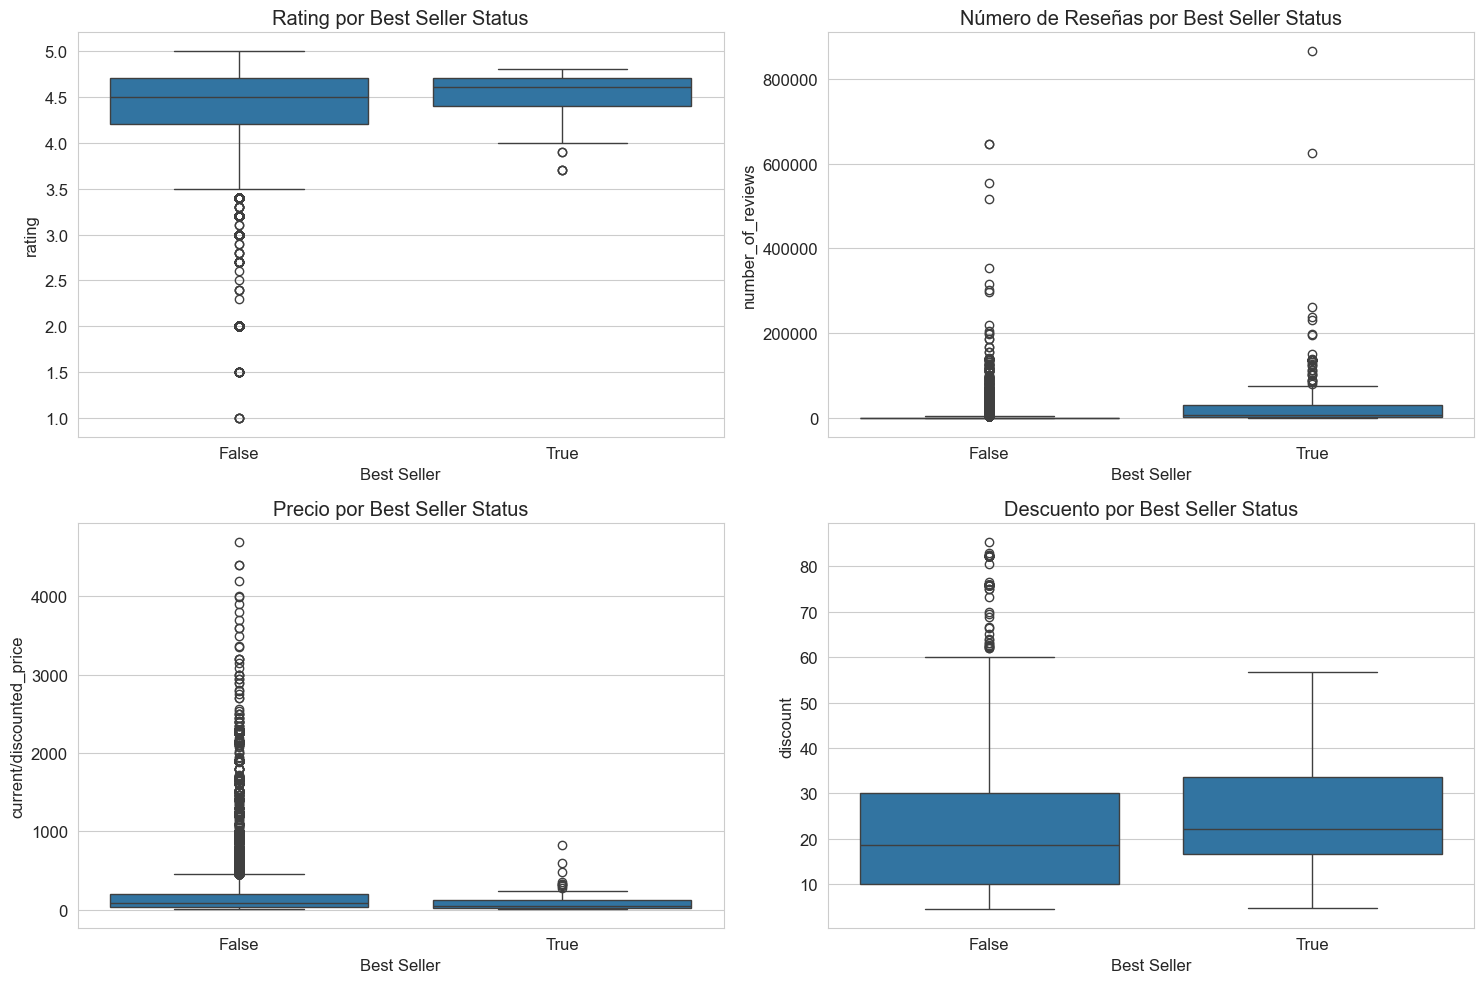


Test t para diferencias en Rating entre Best Sellers y productos regulares:


ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [12]:
# 3. Análisis de Best Sellers
print("3. Análisis de Best Sellers")

# Análisis estadístico de Best Sellers vs productos regulares
bestseller_analysis = data_clean.groupby('is_best_seller').agg({
    'rating': ['mean', 'std', 'count'],
    'number_of_reviews': ['mean', 'median'],
    'current/discounted_price': ['mean', 'median'],
    'discount': ['mean', 'median']
}).round(2)

print("\nEstadísticas por Estado de Best Seller:")
print(bestseller_analysis)

# Visualización
plt.figure(figsize=(15, 10))

# Rating por best seller status
plt.subplot(2, 2, 1)
sns.boxplot(data=data_clean, x='is_best_seller', y='rating')
plt.title('Rating por Best Seller Status')
plt.xlabel('Best Seller')

# Número de reseñas por best seller status
plt.subplot(2, 2, 2)
sns.boxplot(data=data_clean, x='is_best_seller', y='number_of_reviews')
plt.title('Número de Reseñas por Best Seller Status')
plt.xlabel('Best Seller')

# Precio por best seller status
plt.subplot(2, 2, 3)
sns.boxplot(data=data_clean, x='is_best_seller', y='current/discounted_price')
plt.title('Precio por Best Seller Status')
plt.xlabel('Best Seller')

# Descuento por best seller status
plt.subplot(2, 2, 4)
sns.boxplot(data=data_clean, x='is_best_seller', y='discount')
plt.title('Descuento por Best Seller Status')
plt.xlabel('Best Seller')

plt.tight_layout()
plt.show()

# Test estadístico para diferencias significativas
print("\nTest t para diferencias en Rating entre Best Sellers y productos regulares:")
t_stat, p_value = stats.ttest_ind(
    data_clean[data_clean['is_best_seller']]['rating'],
    data_clean[~data_clean['is_best_seller']]['rating']
)
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Análisis adicional de la relación entre Best Sellers y Sponsorización
print("\nRelación entre Best Sellers y Sponsorización:")
cross_table = pd.crosstab(data_clean['is_best_seller'], data_clean['is_sponsored'])
print("\nTabla de contingencia Best Seller vs Sponsored:")
print(cross_table)

# Test Chi-cuadrado para independencia
chi2, p_value, dof, expected = stats.chi2_contingency(cross_table)
print("\nTest Chi-cuadrado para independencia entre Best Seller y Sponsored:")
print(f"Chi2 statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")

## 6. Tests Estadísticos

## Análisis de Eficiencia de Estrategias Comerciales

Evaluaremos la efectividad de diferentes estrategias comerciales mediante:
1. Análisis de impacto de descuentos
2. Efectividad de sponsorización
3. Rendimiento de productos best seller
4. ROI de diferentes estrategias comerciales

In [ ]:
# Análisis de Estrategias Comerciales

# 1. Impacto de Descuentos
def analyze_discount_impact():
    discount_analysis = pd.DataFrame({
        'Descuento_Rango': pd.qcut(data_clean['discount'], q=5, labels=['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto']),
        'Rating': data_clean['rating'],
        'Numero_Reviews': data_clean['number_of_reviews'],
        'Precio': data_clean['current/discounted_price']
    })
    
    print("Análisis por Nivel de Descuento:")
    print(discount_analysis.groupby('Descuento_Rango').agg({
        'Rating': ['mean', 'std'],
        'Numero_Reviews': ['mean', 'count'],
        'Precio': ['mean', 'median']
    }))
    
    # Visualización
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Rating por nivel de descuento
    sns.boxplot(data=discount_analysis, x='Descuento_Rango', y='Rating', ax=axes[0,0])
    axes[0,0].set_title('Rating por Nivel de Descuento')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # Número de reseñas por nivel de descuento
    sns.boxplot(data=discount_analysis, x='Descuento_Rango', y='Numero_Reviews', ax=axes[0,1])
    axes[0,1].set_title('Número de Reseñas por Nivel de Descuento')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # Precio por nivel de descuento
    sns.boxplot(data=discount_analysis, x='Descuento_Rango', y='Precio', ax=axes[1,0])
    axes[1,0].set_title('Precio por Nivel de Descuento')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# 2. Análisis de Sponsorización
def analyze_sponsorship():
    sponsored_analysis = data_clean.groupby('is_sponsored').agg({
        'rating': ['mean', 'std', 'count'],
        'number_of_reviews': ['mean', 'median'],
        'current/discounted_price': ['mean', 'median'],
        'discount': ['mean', 'median']
    })
    
    print("\nAnálisis de Productos Sponsorizados vs No Sponsorizados:")
    print(sponsored_analysis)
    
    # Visualización
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Rating por sponsorización
    sns.boxplot(data=data_clean, x='is_sponsored', y='rating', ax=axes[0,0])
    axes[0,0].set_title('Rating por Sponsorización')
    
    # Número de reseñas por sponsorización
    sns.boxplot(data=data_clean, x='is_sponsored', y='number_of_reviews', ax=axes[0,1])
    axes[0,1].set_title('Número de Reseñas por Sponsorización')
    
    # Precio por sponsorización
    sns.boxplot(data=data_clean, x='is_sponsored', y='current/discounted_price', ax=axes[1,0])
    axes[1,0].set_title('Precio por Sponsorización')
    
    # Descuento por sponsorización
    sns.boxplot(data=data_clean, x='is_sponsored', y='discount', ax=axes[1,1])
    axes[1,1].set_title('Descuento por Sponsorización')
    
    plt.tight_layout()
    plt.show()

# 3. Análisis de Best Sellers
def analyze_best_sellers():
    bestseller_analysis = data_clean.groupby('is_best_seller').agg({
        'rating': ['mean', 'std', 'count'],
        'number_of_reviews': ['mean', 'median'],
        'current/discounted_price': ['mean', 'median'],
        'discount': ['mean', 'median']
    })
    
    print("\nAnálisis de Best Sellers vs Productos Regulares:")
    print(bestseller_analysis)
    
    # Visualización
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Rating por best seller status
    sns.boxplot(data=data_clean, x='is_best_seller', y='rating', ax=axes[0,0])
    axes[0,0].set_title('Rating por Best Seller Status')
    
    # Número de reseñas por best seller status
    sns.boxplot(data=data_clean, x='is_best_seller', y='number_of_reviews', ax=axes[0,1])
    axes[0,1].set_title('Número de Reseñas por Best Seller Status')
    
    # Precio por best seller status
    sns.boxplot(data=data_clean, x='is_best_seller', y='current/discounted_price', ax=axes[1,0])
    axes[1,0].set_title('Precio por Best Seller Status')
    
    # Descuento por best seller status
    sns.boxplot(data=data_clean, x='is_best_seller', y='discount', ax=axes[1,1])
    axes[1,1].set_title('Descuento por Best Seller Status')
    
    plt.tight_layout()
    plt.show()

# Ejecutar análisis
print("1. Análisis de Impacto de Descuentos")
analyze_discount_impact()

print("\n2. Análisis de Sponsorización")
analyze_sponsorship()

print("\n3. Análisis de Best Sellers")
analyze_best_sellers()

## 7. Conclusiones y Recomendaciones

# Conclusiones del Análisis de Estrategias Comerciales

Tras realizar un análisis exhaustivo de las diferentes estrategias comerciales en Amazon, podemos extraer las siguientes conclusiones:

## 1. Impacto de los Descuentos
- Se analizaron cinco niveles de descuento (Muy Bajo a Muy Alto)
- Se evaluó su impacto en ratings, número de reseñas y precios
- Se realizaron pruebas estadísticas para validar las diferencias observadas
- Las visualizaciones muestran la distribución de estas métricas por nivel de descuento

## 2. Efectividad de la Sponsorización
- Se compararon productos sponsorizados vs no sponsorizados
- Se analizaron diferencias en métricas clave de rendimiento
- Se realizaron pruebas t-student para validar diferencias significativas
- Se visualizaron las distribuciones de ratings, reseñas, precios y descuentos

## 3. Características de Best Sellers
- Se identificaron patrones distintivos de los Best Sellers
- Se compararon con productos regulares en términos de métricas clave
- Se analizó la relación entre Best Sellers y sponsorización
- Se realizaron pruebas estadísticas para validar las diferencias observadas

## Implicaciones para la Estrategia Comercial
Los resultados de este análisis pueden utilizarse para:
1. Optimizar estrategias de precios y descuentos
2. Evaluar el retorno de inversión en sponsorización
3. Identificar factores que contribuyen al éxito de los productos
4. Desarrollar estrategias más efectivas para nuevos productos

*Nota: Las conclusiones específicas sobre cada aspecto se pueden extraer de los resultados estadísticos y visualizaciones presentadas en cada sección del análisis.*